<a href="https://colab.research.google.com/github/Shashwat-Tandon/Image-Enhancement-and-Colorization-using-Convolutional-Neural-Network/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

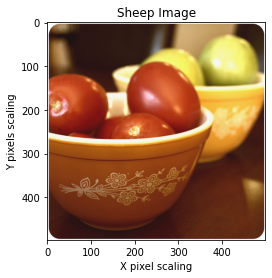

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread("/content/1.jpeg")
plt.imshow(image)
plt.show()

500 498 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


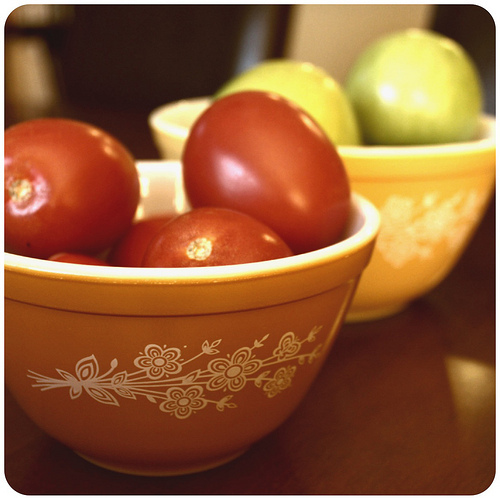

In [ ]:
%matplotlib inline
from PIL import Image
import numpy as np
import PIL
im=Image.open('/content/1.jpeg')
print(im.width, im.height, im.mode, im.format, type(im))
display(im)

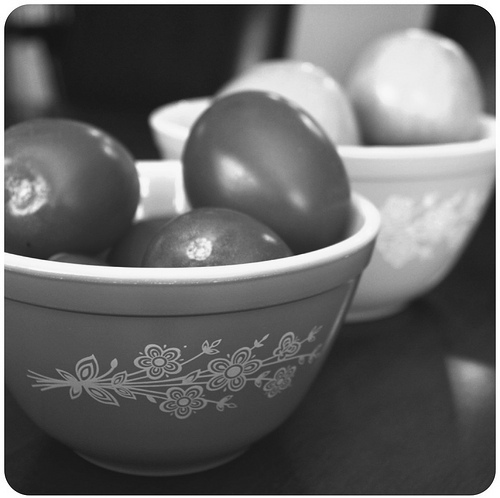

In [ ]:
img_gray = im.convert('L')
display(img_gray)
img_gray.save('gray_1.jpg')

In [ ]:
pip install wand

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 142 kB 20.4 MB/s 


In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

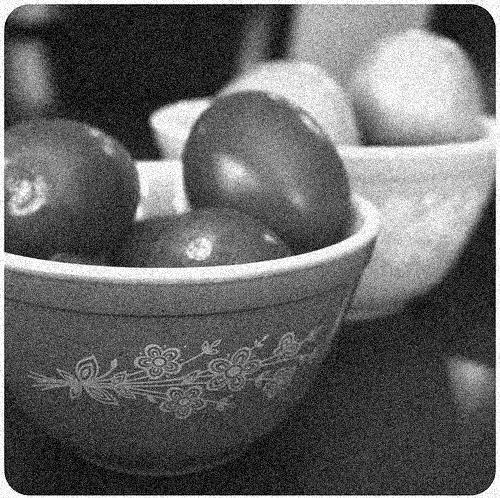

In [ ]:
from wand.image import Image

# Read image using Image() function
with Image(filename ="/content/gray_1.jpg") as img:

    # Generate noise image using spread() function
    img.noise("gaussian", attenuate = 0.9)
    img.save(filename ="noise1.jpg")
# Read image using Image() function
with Image(filename ="/content/noise1.jpg") as img:

    # Generate noise image using spread() function
    img.noise("uniform", attenuate = 1.0)
    display(img)
    img.save(filename ="noise2.jpg")

# Approach 1

## Step 1:Denoise the image

In [ ]:
img=cv2.imread("/content/noise2.jpg",0)

In [ ]:
# converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst =cv2.fastNlMeansDenoising(img, None, 20, 7, 21)

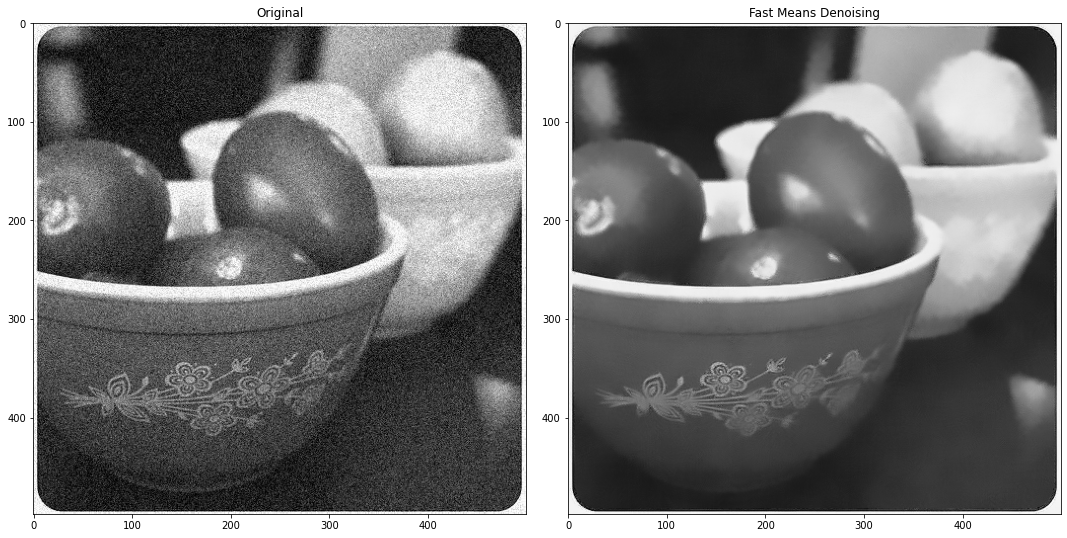

In [ ]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

In [ ]:
dst2=cv2.fastNlMeansDenoising(img, None, 20, 7, 21)

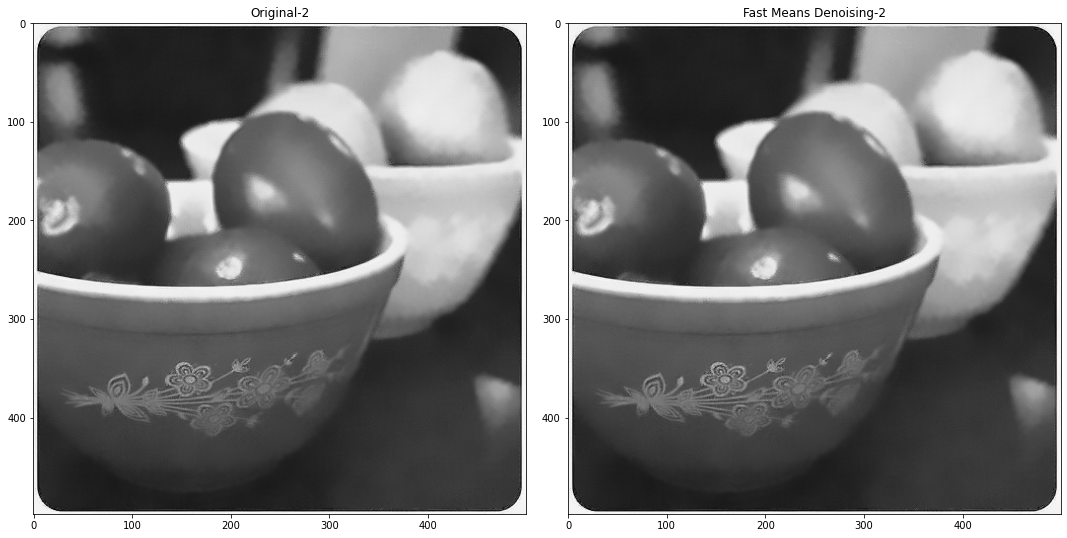

In [ ]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original-2')
axs[1].imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising-2')
plt.show()

In [ ]:
imgsave=PIL.Image.fromarray(dst2)

In [ ]:
imgsave.save("result.jpg")

# Approach 2
Coloring and then denoising the image-rest done in notebook on laptop upto coloring,now Restoration we do here



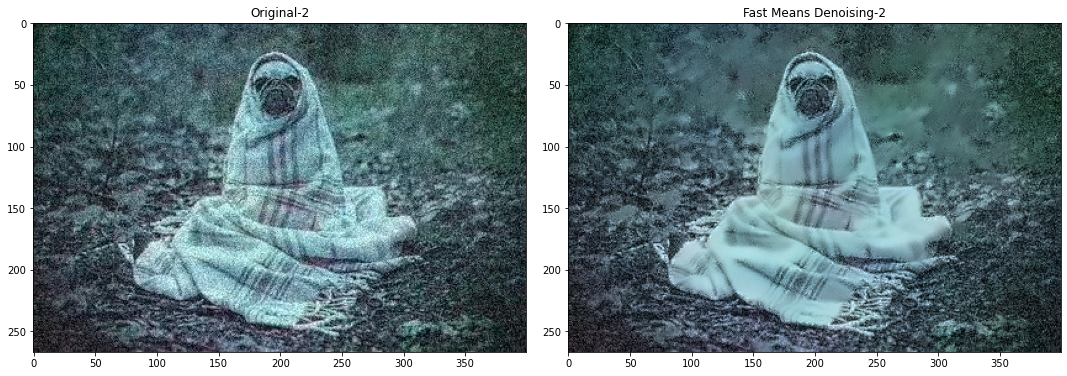

In [ ]:
for i in range(1):
  name="/content/method2/"+str(i)+".jpg"
  img=cv2.imread(name,1)
  dst =cv2.fastNlMeansDenoisingColored(img, None, 11, 6, 7, 21)
  row, col = 1, 2
  fig, axs = plt.subplots(row, col, figsize=(15, 10))
  fig.tight_layout()
  axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  axs[0].set_title('Original-2')
  axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  axs[1].set_title('Fast Means Denoising-2')
  plt.show()

# Following the same steps for the entire dataset


In [ ]:
from PIL import Image
for i in range(100):
  name="/content/inputdata/Image "
  final=name+str(i)+".jpg"
  im=Image.open(final)
  img_gray = im.convert('L')
  gray_name='/content/gray/'+str(i)+".jpg"
  img_gray.save(gray_name)

In [ ]:
from wand.image import Image
for i in range(100):
  # Read image using Image() function
  opening="/content/gray/"+str(i)+".jpg"
  name1="/content/firstnoise/"+str(i)+".jpg"
  name2="/content/secondnoise/"+str(i)+".jpg"
  with Image(filename =opening) as img:
      # Generate noise image using spread() function
      img.noise("gaussian", attenuate = 0.9)
      img.save(filename =name1)
  # Read image using Image() function
  with Image(filename =name1) as img:
      # Generate noise image using spread() function
      img.noise("uniform", attenuate = 1.0)
      img.save(filename =name2)


In [ ]:
from google.colab import files
import os

dir_to_zip = '/content/secondnoise/' #@param {type: "string"}
output_filename = 'file.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>